# Library

In [14]:
import re
import pandas as pd
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.util import ngrams

# Stopwords dan stemming

In [19]:
#mulai
def preprocessTweet(tweet):
    #menjadikan huruf kecil
    tweet = tweet.lower()
    
    #menghapus url
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    
    #menghapus spasi tambahan
    tweet = re.sub('[\s]+', ' ', tweet)
    
    #menghapus hashtag
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #menghapus mention
    tweet = re.sub('@[^\s]+','',tweet)
    
    #menghapus simbol tidak bermakna
    tweet = re.sub('[/"-.!:?]','',tweet)
    
    #menghapus huruf berulang
    tweet = re.sub(r'(\w)\1{2,}', r'\1', tweet)
    
    #trim
    tweet = tweet.strip('\'"22')
    
    #menjadikan kata dasar kata
    tweet = stemmer.stem(tweet)
    
    return tweet
#end

In [7]:
#open csv file
data = pd.read_csv('excel/contohdata.csv', delimiter=',', index_col=0)
data

,tweet,sentimen
No,,
1,min gimana caranya pesan tiket online?,netral
2,Bangku di stasiun malang jelek,negatif
3,Petugas di gerbong 2 tidak ramah,negatif
4,nasi gorengnya asin,negatif
5,fasilitas di kereta logawa sangat bagusss,positif
6,petugasnya cantik cantik banget,positif
7,apakah bisa makan di dalam kereta?,netral
8,makanannya enak,positif
9,tidak enak,negatif


In [20]:
#kamus = pd.read_csv('excel/contohkamus.csv', delimiter=',')
kamus = pd.read_csv('FileCSV/kamusFix.csv', delimiter=',')
#kamus

In [21]:
n = 0
kata = []
nilai = []
for row in kamus['kata']:
    kata.append(row)
    n+=1
for row in kamus['nilai']:
    nilai.append(row)
    n+=1

In [22]:
print(kata)

['abnormal', 'absurd', 'acak', 'acak-acakan', 'acuh', 'acuh tak acuh', 'adiktif', 'adil', 'agresi', 'agresif', 'agresor', 'aib', 'air terjun', 'akurat', 'alarm', 'alasan', 'alat permainan', 'alergi', 'alergik', 'amat ketakutan', 'amat panas', 'ambigu', 'ambivalen', 'ambivalensi', 'amoral', 'amoralitas', 'ampun', 'amuk', 'anak nakal', 'anak yatim', 'anarki', 'anarkis', 'anarkisme', 'ancaman', 'aneh', 'aneh lagi', 'anehnya', 'angkuh', 'angriness', 'anjing', 'anjlok', 'anomali', 'antagonis', 'antagonisme', 'antek', 'anti-', 'anti-Amerika', 'anti-Israel', 'anti-kita', 'anti-pendudukan', 'anti-proliferasi', 'anti-putih', 'anti-Semit', 'antipati', 'antisosial', 'antitesis', 'apak', 'apati', 'apatis', 'apek', 'apokaliptik', 'apologis', 'argumentatif', 'artinya jika', 'asam', 'asap', 'asem', 'asing', 'astaghfirullah', 'asusila', 'awan', 'awas', 'babi', 'badai', 'bahan tertawaan', 'bahaya', 'bajingan', 'baju kotor', 'balas dendam', 'bandel', 'bandot', 'bangkrut', 'bantingan', 'banyak sekali', '

In [23]:
print(nilai)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [24]:
lexicon = {}
index = 0
for row in kata:
    lexicon[row] = nilai[index]
    index+=1
print(lexicon)

{'abnormal': -1, 'absurd': -1, 'acak': -1, 'acak-acakan': -1, 'acuh': -1, 'acuh tak acuh': -1, 'adiktif': -1, 'adil': 1, 'agresi': -1, 'agresif': -1, 'agresor': -1, 'aib': -1, 'air terjun': -1, 'akurat': 1, 'alarm': -1, 'alasan': -1, 'alat permainan': -1, 'alergi': -1, 'alergik': -1, 'amat ketakutan': -1, 'amat panas': -1, 'ambigu': -1, 'ambivalen': -1, 'ambivalensi': -1, 'amoral': -1, 'amoralitas': -1, 'ampun': -1, 'amuk': -1, 'anak nakal': -1, 'anak yatim': -1, 'anarki': -1, 'anarkis': -1, 'anarkisme': -1, 'ancaman': -1, 'aneh': 1, 'aneh lagi': -1, 'anehnya': -1, 'angkuh': -1, 'angriness': -1, 'anjing': -1, 'anjlok': -1, 'anomali': -1, 'antagonis': -1, 'antagonisme': -1, 'antek': -1, 'anti-': -1, 'anti-Amerika': -1, 'anti-Israel': -1, 'anti-kita': -1, 'anti-pendudukan': -1, 'anti-proliferasi': -1, 'anti-putih': -1, 'anti-Semit': -1, 'antipati': -1, 'antisosial': -1, 'antitesis': -1, 'apak': -1, 'apati': -1, 'apatis': -1, 'apek': -1, 'apokaliptik': -1, 'apologis': -1, 'argumentatif': 

# Tokenization

In [18]:
#NGram

#Unigram
s = "apakah saya harus makan dengan ayam goreng atau dengan ayang kamu"
s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
uni = list(ngrams(tokens, 1))
uni

[('apakah',),
 ('saya',),
 ('harus',),
 ('makan',),
 ('dengan',),
 ('ayam',),
 ('goreng',),
 ('atau',),
 ('dengan',),
 ('ayang',),
 ('kamu',)]

In [17]:
#Bigram
tokens = [token for token in s.split(" ") if token != ""]
bi = list(ngrams(tokens, 2))
bi

[('apakah', 'saya'),
 ('saya', 'harus'),
 ('harus', 'makan'),
 ('makan', 'dengan'),
 ('dengan', 'ayam'),
 ('ayam', 'goreng'),
 ('goreng', 'atau'),
 ('atau', 'dengan'),
 ('dengan', 'ayang'),
 ('ayang', 'kamu')]

In [16]:
#Trigram
tokens = [token for token in s.split(" ") if token != ""]
tri = list(ngrams(tokens, 3))
tri

[('apakah', 'saya', 'harus'),
 ('saya', 'harus', 'makan'),
 ('harus', 'makan', 'dengan'),
 ('makan', 'dengan', 'ayam'),
 ('dengan', 'ayam', 'goreng'),
 ('ayam', 'goreng', 'atau'),
 ('goreng', 'atau', 'dengan'),
 ('atau', 'dengan', 'ayang'),
 ('dengan', 'ayang', 'kamu')]

# Pencocokan dengan kamus

In [25]:
dataClean = {}
ng = 0
po = 0
nt = 0
benar = 0
for tweet in data['tweet']:
    preprocessedTweet = preprocessTweet(tweet)
    #print(preprocessedTweet.split())
    #print(preprocessedTweet)
    score = 0
    for word in preprocessedTweet.split():
        #print(word)
        if word in lexicon:
            score = score + lexicon[word]
            #print(word)
            #print(lexicon[word])
    if (score > 0):
        print('positif',score)
        po+=1
    elif(score < 0):
        print('negatif',score)
        ng+=1
    else:
        print('netral',score)
        nt+=1

negatif -1
negatif -2
netral 0
negatif -1
positif 1
positif 2
negatif -1
positif 1
netral 0
positif 2


In [26]:
data

,tweet,sentimen
No,,
1,min gimana caranya pesan tiket online?,netral
2,Bangku di stasiun malang jelek,negatif
3,Petugas di gerbong 2 tidak ramah,negatif
4,nasi gorengnya asin,negatif
5,fasilitas di kereta logawa sangat bagusss,positif
6,petugasnya cantik cantik banget,positif
7,apakah bisa makan di dalam kereta?,netral
8,makanannya enak,positif
9,tidak enak,negatif


In [27]:
data['sentimen'].value_counts()

negatif    4
positif    4
netral     2
Name: sentimen, dtype: int64

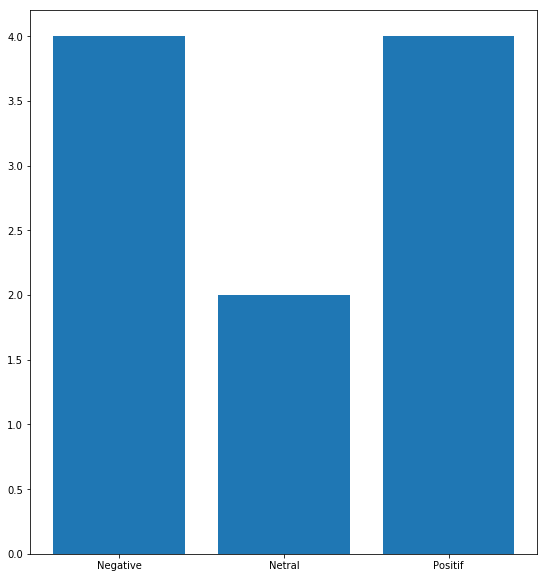

In [26]:
# Initialize the plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)


# or replace the three lines of code above by the following line: 
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

# Plot the data
ax1.bar(['Negative','Netral','Positif'],[ng,nt,po])


# Show the plot
plt.show()

In [27]:
data

,tweet,sentimen
No,,
1,min gimana caranya pesan tiket online?,netral
2,Bangku di stasiun malang jelek,negatif
3,Petugas di gerbong 2 tidak ramah,negatif
4,nasi gorengnya asin,negatif
5,fasilitas di kereta logawa sangat bagusss,positif
6,petugasnya cantik cantik banget,positif
7,apakah bisa makan di dalam kereta?,netral
8,makanannya enak,positif
9,tidak enak,negatif


In [28]:
positif = data[data['sentimen'] == 1]
positif = data['tweet']

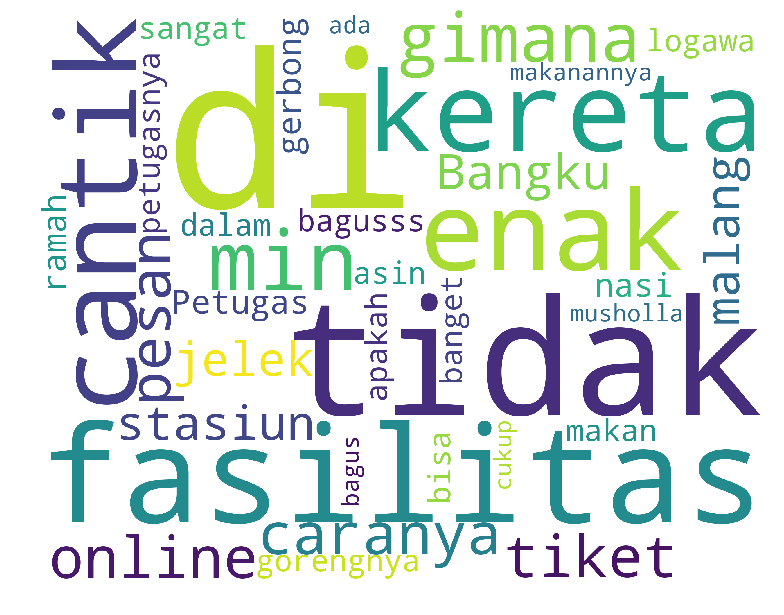

In [29]:
def draw_wordcloud(data, color = 'black'):
    words=' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color=color,
                         width=2500,
                         height=2000
                         ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print('')
draw_wordcloud(positif, 'white')